In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# import math functions
import math

In [3]:
#Plot import
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# ML imports
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import train_test_split

# For Evaluate ML results
from sklearn import metrics

In [7]:
# Dataset import
import statsmodels.api as sm

In [8]:
df = sm.datasets.fair.load_pandas().data

In [9]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [10]:
def affair_check(x):
    if x != 0:
        return 1
    else: 
        return 0

In [17]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [18]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had Affair,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1,1


In [20]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had Affair
Had_Affair,,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000,0
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243,1


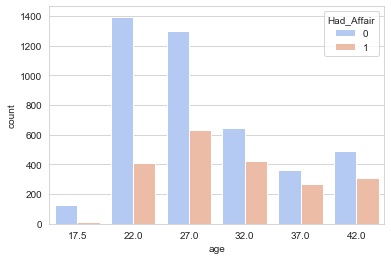

In [27]:
sns.countplot('age', data = df, hue= 'Had_Affair', palette = 'coolwarm') #checking women's age wise affair

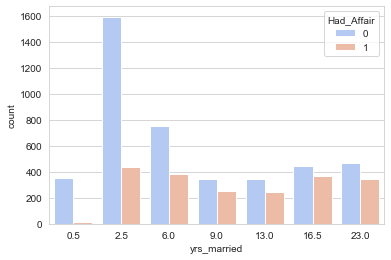

In [26]:
sns.countplot('yrs_married', data = df, hue= 'Had_Affair', palette = 'coolwarm') # checking womens year married wise affair

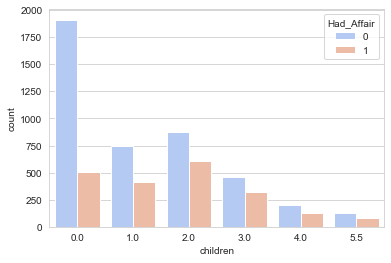

In [28]:
sns.countplot('children', data = df, hue= 'Had_Affair', palette = 'coolwarm') # checking womens children wise affair

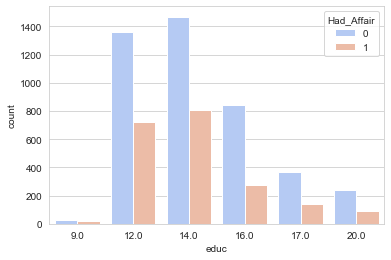

In [29]:
sns.countplot('educ', data = df, hue= 'Had_Affair', palette = 'coolwarm') # checking womens education wise affair

In [37]:
# crearing new dataframes for cateogrical values
occ_dumies= pd.get_dummies(df['occupation'])
hus_occ_dumies = pd.get_dummies(df['occupation_husb'])

In [38]:
hus_occ_dumies = pd.get_dummies(df['occupation_husb'])# the reason for creating dummies values is that the 
                                            #it will get confused while fetching data from main data frame and would fetch 1.2,1.3 etc

In [39]:
occ_dumies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [40]:
# column name for new dataframe col
occ_dumies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']


In [41]:
hus_occ_dumies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [43]:
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1) #drop occup,hadaffair and occuphus and replace with new dummies at columns so axis=1

In [44]:
dummies = pd.concat([occ_dumies, hus_occ_dumies],axis=1)

In [45]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [46]:
X = pd.concat([X, dummies],axis=1)

In [48]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,Had Affair,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0,0,1,0,0,0,0,0,0,1,0,0


In [49]:
Y = df.Had_Affair

In [51]:
Y.tail

<bound method NDFrame.tail of 0       1
1       1
2       1
3       1
4       1
       ..
6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, Length: 6366, dtype: int64>

In [52]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,Had Affair,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0,0,1,0,0,0,0,0,0,1,0,0


In [55]:
X = X.drop('hocc1',axis=1)

In [56]:
X = X.drop('affairs',axis=1)

In [57]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,Had Affair,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0,0,0,1,0,0


In [58]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [59]:
# numpy.ravel  flattens and returns 1D array
Y = np.ravel(Y)

In [60]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [61]:
# Start implement with linear reg model

log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y) # Shows accuracy rate

C:\Users\dharm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [62]:
Y.mean() #SHows % of women having affairs

0.3224945020420987

In [63]:
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))

In [64]:
coeff_df

,0,1
0,rate_marriage,[-0.44378137325134104]
1,age,[-0.07672149877561897]
2,yrs_married,[0.09284789409405053]
3,children,[-0.023608201534897823]
4,religious,[-0.23644273791848225]
5,educ,[-0.09160301940705073]
6,Had Affair,[10.98868081365582]
7,occ2,[-0.3284025218302336]
8,occ3,[-0.21994443057948754]
9,occ4,[-0.09072016000225279]


In [65]:
# Splitting in testing and training sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [66]:
log_model2 = LogisticRegression()

log_model2.fit(X_train, Y_train)

C:\Users\dharm\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# using predict to predict classification labels for next test after that we will reevaluate
class_predict = log_model2.predict(X_test)

In [73]:
print (metrics.accuracy_score(Y_test, class_predict)) #comparing Ytest with class predict #got best accuracy

1.0
